<a href="https://colab.research.google.com/github/oneday14/my_python/blob/master/Box_Jenkins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.5MB 7.7MB/s 
     |████████████████████████████████| 9.5MB 14.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('seaborn-whitegrid')

import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import seaborn as SNS
%matplotlib inline

import itertools

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/1주차/AirPassengers.csv')

In [ ]:
data  # 데이터 확인

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [ ]:
data = data.rename(columns={'Month': 'month', '#Passengers': 'Passengers'})  # 칼럼명 변경
data['month'] = pd.to_datetime(data['month'])  
data = data.set_index('month')  # 인덱스 설정
data

,Passengers
month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


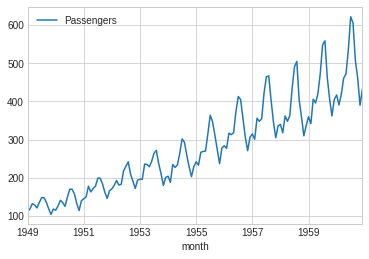

In [ ]:
data.plot()

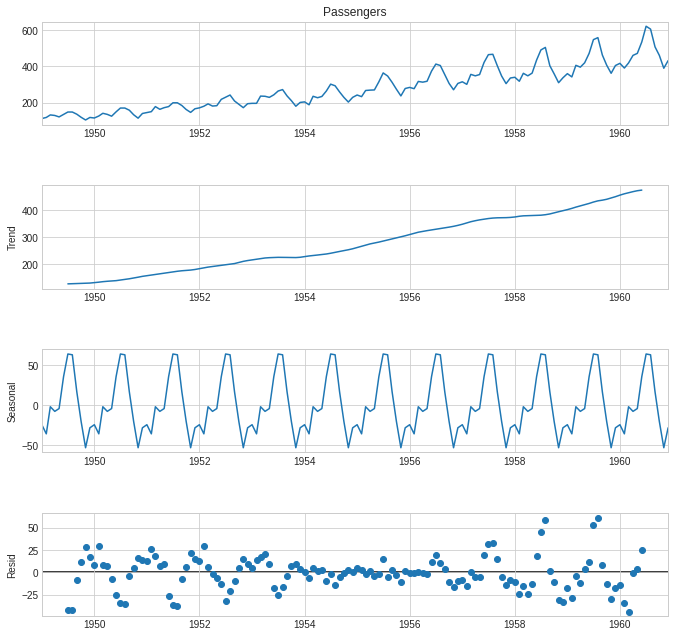

In [ ]:
## Decomposition(분해)
decomposition = sm.tsa.seasonal_decompose(data['Passengers'], model='additive')
fig = decomposition.plot()
fig.set_size_inches(10, 10)
plt.show()

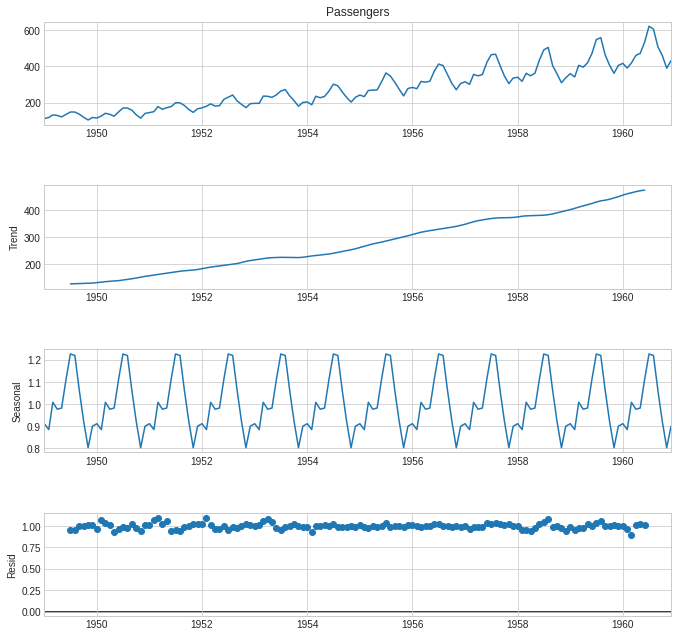

In [ ]:
## Decomposition
decomposition = sm.tsa.seasonal_decompose(data['Passengers'], model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(10, 10)
plt.show()

In [ ]:
decomposition.trend.dropna()

month
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
1949-11-01    129.000000
                 ...    
1960-02-01    461.375000
1960-03-01    465.208333
1960-04-01    469.333333
1960-05-01    472.750000
1960-06-01    475.041667
Name: trend, Length: 132, dtype: float64

In [ ]:
decomposition.seasonal

month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
                ...   
1960-08-01    1.219911
1960-09-01    1.060492
1960-10-01    0.921757
1960-11-01    0.801178
1960-12-01    0.898824
Name: seasonal, Length: 144, dtype: float64

In [ ]:
decomposition.resid.dropna()

month
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
1949-11-01    1.006270
                ...   
1960-02-01    0.959079
1960-03-01    0.894086
1960-04-01    1.006495
1960-05-01    1.017359
1960-06-01    1.012079
Name: resid, Length: 132, dtype: float64

In [ ]:
decomposition.resid.dropna()

month
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
1949-11-01    1.006270
                ...   
1960-02-01    0.959079
1960-03-01    0.894086
1960-04-01    1.006495
1960-05-01    1.017359
1960-06-01    1.012079
Name: resid, Length: 132, dtype: float64

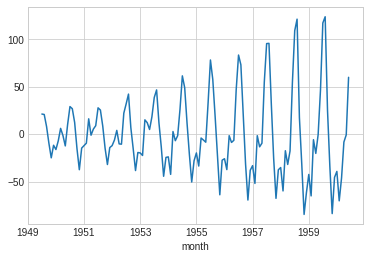

In [ ]:
(data['Passengers'] - decomposition.trend).plot()  # detrend1

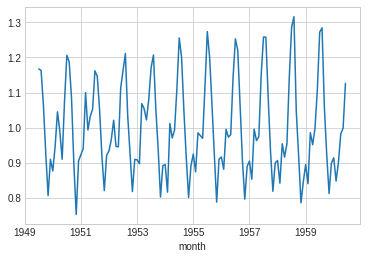

In [ ]:
(data['Passengers'] / decomposition.trend).plot()  # detrend2

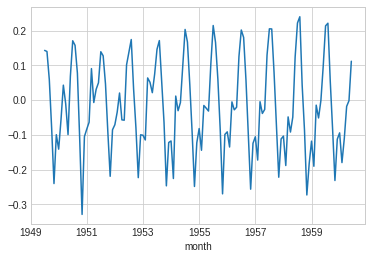

In [ ]:
((data['Passengers'] - decomposition.trend) /data['Passengers'] ).plot()  # detrend3

In [ ]:
import numpy as np
log_data = np.log(data.copy())

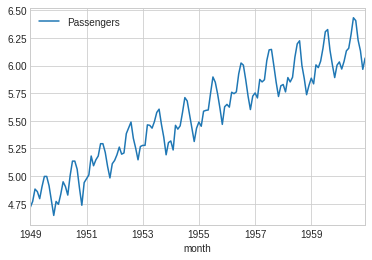

In [ ]:
log_data.plot()  # log를 씌워 분산이 일정해짐

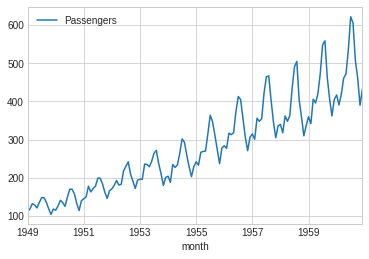

In [ ]:
data.plot()  # 원본데이터

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)  # 일반적 데이터는 shuffle(데이터를 섞어주는 것)

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


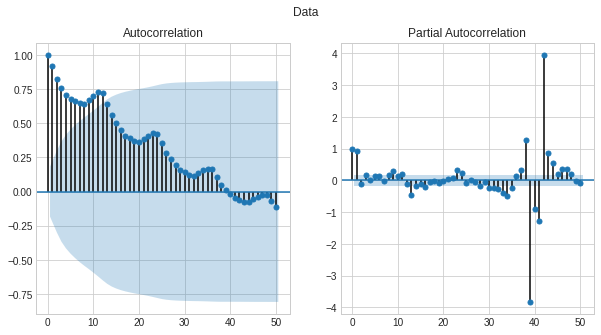

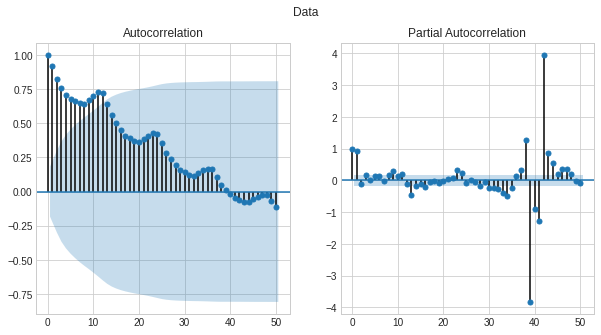

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Data')

sm.graphics.tsa.plot_acf(train_data.values.squeeze(), lags=50, ax=ax[0])  # 비정상시계열인 것을 알 수 있음
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags=50, ax=ax[1])

In [ ]:
import numpy as np
log_train_data = np.log(train_data.copy())
log_test_data = np.log(test_data.copy())
diff_train_data = log_train_data['Passengers'].diff()  # 차분
diff_train_data.dropna(inplace=True)

diff_train_data

month
1949-02-01    0.052186
1949-03-01    0.112117
1949-04-01   -0.022990
1949-05-01   -0.064022
1949-06-01    0.109484
                ...   
1958-03-01    0.129593
1958-04-01   -0.039442
1958-05-01    0.042200
1958-06-01    0.180943
1958-07-01    0.121098
Name: Passengers, Length: 114, dtype: float64

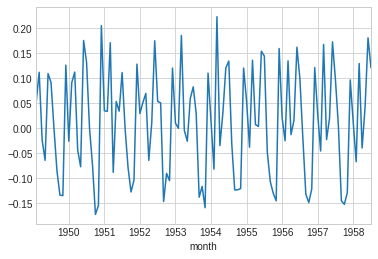

In [ ]:
diff_train_data.plot()

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


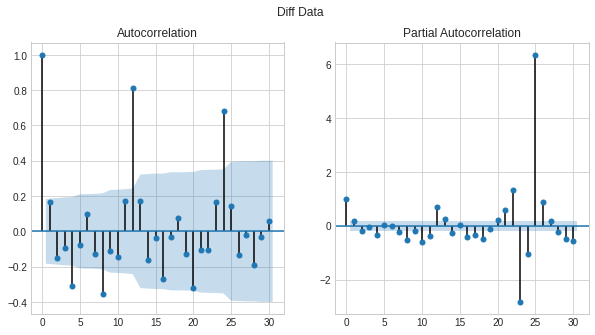

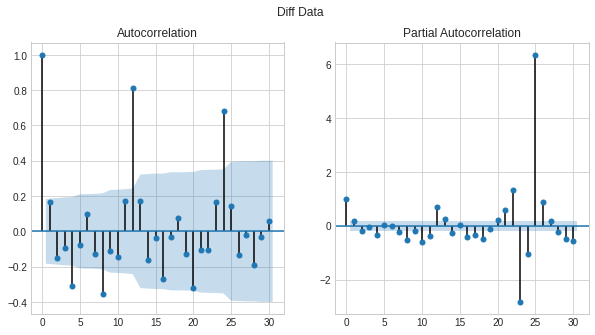

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle('Diff Data')

sm.graphics.tsa.plot_acf(diff_train_data.values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train_data.values.squeeze(), lags=30, ax=ax[1])

In [ ]:
model = ARIMA(log_train_data.values, order=(1,0,0))  # (p, d, q) # = AR(1)
history = model.fit()
history.summary()
# AIC가 낮을 수록 좋음

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  115
Model:                     ARMA(1, 0)   Log Likelihood                  95.552
Method:                       css-mle   S.D. of innovations              0.104
Date:                Fri, 02 Jul 2021   AIC                           -185.104
Time:                        03:57:22   BIC                           -176.869
Sample:                             0   HQIC                          -181.762
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4305      0.345     15.748      0.000       4.755       6.106
ar.L1.y        0.9791      0.020     49.853      0.000       0.941       1.018
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0213           +0.0000j            1.0213            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
p = range(0, 3)
d = range(0, 2)
q = range(0, 3)

pdq = list(itertools.product(p, d, q))  # 경우의 수

aic = []

for i in pdq:
  model = ARIMA(log_train_data.values, order=(i))
  model_fit = model.fit()
  aic.append(model_fit.aic)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have

In [ ]:
aic

[109.11660581011654,
 -20.55227809420097,
 -86.22403725018467,
 -189.73338222563518,
 -192.64088844095863,
 -206.74907419979706,
 -185.10402740507908,
 -189.49801925679589,
 -191.59127488673272,
 -191.0347351180668,
 -196.7015599257038,
 -215.88465391481634,
 -187.61281706607548,
 -192.7407463930769,
 -177.93375353652328,
 -192.84355413614287,
 -217.49945131580432,
 -214.31318176622392]

In [ ]:
optimal = [(pdq[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[((2, 1, 1), -217.49944810181523)]

In [ ]:
opt_model = ARIMA(log_train_data.values, order=optimal[0][0])
opt_model_fit = opt_model.fit()

opt_model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:701: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-para

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  114
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 113.750
Method:                       css-mle   S.D. of innovations              0.088
Date:                Fri, 02 Jul 2021   AIC                           -217.499
Time:                        05:02:34   BIC                           -203.818
Sample:                             1   HQIC                          -211.947
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0109      0.001     19.481      0.000       0.010       0.012
ar.L1.D.y      0.9467      0.087     10.920      0.000       0.777       1.117
ar.L2.D.y     -0.3812      0.086     -4.413      0.000      -0.550      -0.212
ma.L1.D.y     -1.0000      0.024    -42.464      0.000      -1.046      -0.954
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2419           -1.0398j            1.6197           -0.1109
AR.2            1.2419           +1.0398j            1.6197            0.1109
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
pred = opt_model_fit.forecast(len(log_test_data))

In [ ]:
pred  # 예측값, 예측값의 편차, 신뢰구간

(array([6.17785693, 6.11885492, 6.07483496, 6.06040409, 6.06827557,
        6.08598293, 6.10450126, 6.12003817, 6.13244335, 6.14302004,
        6.15305937, 6.16328691, 6.17389749, 6.18479894, 6.19582979,
        6.20687226, 6.2178764 , 6.22883985, 6.23977936, 6.25071172,
        6.26164645, 6.27258614, 6.28352962, 6.2944748 , 6.30542015,
        6.316365  , 6.32730933, 6.33825334, 6.34919726]),
 array([0.08764941, 0.12070184, 0.12887327, 0.1293527 , 0.12952484,
        0.12995435, 0.1301675 , 0.13020256, 0.13020256, 0.13020754,
        0.13021209, 0.13021348, 0.13021358, 0.1302136 , 0.13021366,
        0.13021369, 0.13021369, 0.13021369, 0.1302137 , 0.1302137 ,
        0.1302137 , 0.1302137 , 0.1302137 , 0.1302137 , 0.1302137 ,
        0.1302137 , 0.1302137 , 0.1302137 , 0.1302137 ]),
 array([[6.00606725, 6.34964661],
        [5.88228365, 6.35542619],
        [5.822248  , 6.32742192],
        [5.80687746, 6.31393073],
        [5.81441155, 6.32213958],
        [5.83127708, 6.34068878],


In [ ]:
predicted_values = np.exp(pred[0])

In [ ]:
pred_lb = np.exp(pred[2][:,0])

In [ ]:
pred_ub = np.exp(pred[2][:,1])

In [ ]:
pred_index = list(test_data.index)
r2 = r2_score(test_data, predicted_values)

In [ ]:
r2  # 높을 수록 좋음

-0.2247709626490777

In [ ]:
pred_index

[Timestamp('1958-08-01 00:00:00'),
 Timestamp('1958-09-01 00:00:00'),
 Timestamp('1958-10-01 00:00:00'),
 Timestamp('1958-11-01 00:00:00'),
 Timestamp('1958-12-01 00:00:00'),
 Timestamp('1959-01-01 00:00:00'),
 Timestamp('1959-02-01 00:00:00'),
 Timestamp('1959-03-01 00:00:00'),
 Timestamp('1959-04-01 00:00:00'),
 Timestamp('1959-05-01 00:00:00'),
 Timestamp('1959-06-01 00:00:00'),
 Timestamp('1959-07-01 00:00:00'),
 Timestamp('1959-08-01 00:00:00'),
 Timestamp('1959-09-01 00:00:00'),
 Timestamp('1959-10-01 00:00:00'),
 Timestamp('1959-11-01 00:00:00'),
 Timestamp('1959-12-01 00:00:00'),
 Timestamp('1960-01-01 00:00:00'),
 Timestamp('1960-02-01 00:00:00'),
 Timestamp('1960-03-01 00:00:00'),
 Timestamp('1960-04-01 00:00:00'),
 Timestamp('1960-05-01 00:00:00'),
 Timestamp('1960-06-01 00:00:00'),
 Timestamp('1960-07-01 00:00:00'),
 Timestamp('1960-08-01 00:00:00'),
 Timestamp('1960-09-01 00:00:00'),
 Timestamp('1960-10-01 00:00:00'),
 Timestamp('1960-11-01 00:00:00'),
 Timestamp('1960-12-

Text(0.5, 0.98, 'ARIMA (2, 1, 1) Prediction Result (r2 score: -0.2247709626490777')

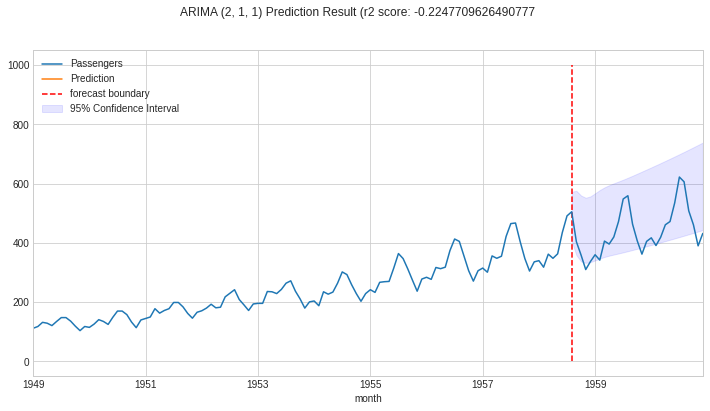

In [ ]:
fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)

data.plot(ax=ax)
ax.vlines('1958-08-01', 0, 1000, linestyle='--', color='r', label='forecast boundary')
ax.fill_between(pred_index, pred_lb, pred_ub, color='b', alpha=0.1, label='95% Confidence Interval')  # alpha : 투명도
ax.plot(pred_index, predicted_values, label='Prediction')
ax.legend(loc='upper left')
plt.suptitle(f"ARIMA {optimal[0][0]} Prediction Result (r2 score: {r2}")
# plt.show()

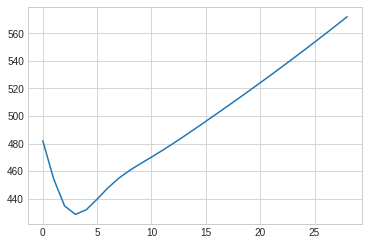

In [ ]:
plt.plot(predicted_values)

In [ ]:
pred

(array([6.17785693, 6.11885492, 6.07483496, 6.06040409, 6.06827557,
        6.08598293, 6.10450126, 6.12003817, 6.13244335, 6.14302004,
        6.15305937, 6.16328691, 6.17389749, 6.18479894, 6.19582979,
        6.20687226, 6.2178764 , 6.22883985, 6.23977936, 6.25071172,
        6.26164645, 6.27258614, 6.28352962, 6.2944748 , 6.30542015,
        6.316365  , 6.32730933, 6.33825334, 6.34919726]),
 array([0.08764941, 0.12070184, 0.12887327, 0.1293527 , 0.12952484,
        0.12995435, 0.1301675 , 0.13020256, 0.13020256, 0.13020754,
        0.13021209, 0.13021348, 0.13021358, 0.1302136 , 0.13021366,
        0.13021369, 0.13021369, 0.13021369, 0.1302137 , 0.1302137 ,
        0.1302137 , 0.1302137 , 0.1302137 , 0.1302137 , 0.1302137 ,
        0.1302137 , 0.1302137 , 0.1302137 , 0.1302137 ]),
 array([[6.00606725, 6.34964661],
        [5.88228365, 6.35542619],
        [5.822248  , 6.32742192],
        [5.80687746, 6.31393073],
        [5.81441155, 6.32213958],
        [5.83127708, 6.34068878],


In [ ]:
# 계절성이 있는데 , ARIMA를 사용했기 때문에 예측력이 떨어짐. 따라서 SARIMA고려

In [ ]:
opt_model = SARIMAX(log_train_data.values, order=(2,1,1), seasonal_order=(2,1,1,12))  # 12 : seasonality 존재하는 주기
opt_model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [ ]:
opt_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  114
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 113.157
Method:                       css-mle   S.D. of innovations              0.088
Date:                Fri, 02 Jul 2021   AIC                           -214.313
Time:                        05:16:12   BIC                           -197.896
Sample:                             1   HQIC                          -207.650
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0110      0.001     15.687      0.000       0.010       0.012
ar.L1.D.y      0.2512      0.210      1.198      0.231      -0.160       0.662
ar.L2.D.y      0.1586      0.186      0.853      0.394      -0.206       0.523
ma.L1.D.y     -0.2761      0.179     -1.547      0.122      -0.626       0.074
ma.L2.D.y     -0.7238      0.178     -4.070      0.000      -1.072      -0.375
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8411           +0.0000j            1.8411            0.0000
AR.2           -3.4252           +0.0000j            3.4252            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.3815           +0.0000j            1.3815            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
pred

(array([6.17785693, 6.11885492, 6.07483496, 6.06040409, 6.06827557,
        6.08598293, 6.10450126, 6.12003817, 6.13244335, 6.14302004,
        6.15305937, 6.16328691, 6.17389749, 6.18479894, 6.19582979,
        6.20687226, 6.2178764 , 6.22883985, 6.23977936, 6.25071172,
        6.26164645, 6.27258614, 6.28352962, 6.2944748 , 6.30542015,
        6.316365  , 6.32730933, 6.33825334, 6.34919726]),
 array([0.08764941, 0.12070184, 0.12887327, 0.1293527 , 0.12952484,
        0.12995435, 0.1301675 , 0.13020256, 0.13020256, 0.13020754,
        0.13021209, 0.13021348, 0.13021358, 0.1302136 , 0.13021366,
        0.13021369, 0.13021369, 0.13021369, 0.1302137 , 0.1302137 ,
        0.1302137 , 0.1302137 , 0.1302137 , 0.1302137 , 0.1302137 ,
        0.1302137 , 0.1302137 , 0.1302137 , 0.1302137 ]),
 array([[6.00606725, 6.34964661],
        [5.88228365, 6.35542619],
        [5.822248  , 6.32742192],
        [5.80687746, 6.31393073],
        [5.81441155, 6.32213958],
        [5.83127708, 6.34068878],


Text(0.5, 0.98, 'SARIMA (2, 1, 1) Prediction Result (r2 score: -0.30030906655867784')

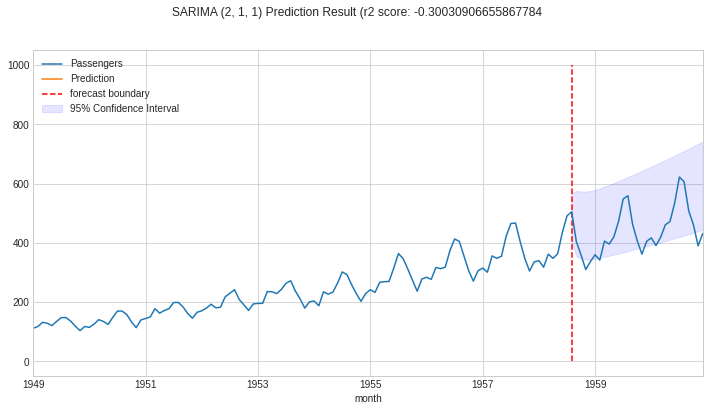

In [ ]:
pred = opt_model_fit.forecast(len(test_data))
predicted_values = np.exp(pred[0])
pred_lb = np.exp(pred[2][:,0])
pred_ub = np.exp(pred[2][:,1])

pred_index = list(test_data.index)
r2 = r2_score(test_data, predicted_values)

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)
data.plot(ax=ax)
ax.vlines('1958-08-01', 0, 1000, linestyle='--', color='r', label='forecast boundary')
ax.fill_between(pred_index, pred_lb, pred_ub, color='b', alpha=0.1, label='95% Confidence Interval')
ax.plot(pred_index, predicted_values, label='Prediction')
ax.legend(loc='upper left')
plt.suptitle(f"SARIMA {optimal[0][0]} Prediction Result (r2 score: {r2}")
# plt.show()

In [ ]:
auto_arima_model = auto_arima(log_train_data, start_p = 1, start_q = 1,
                              max_p = 3, max_q = 3, m = 12, seasonal=True,  # m : period
                              d = 1, D=1,
                              max_P=3, maxQ=3,
                              trace=True,
                              error_action='ignore')                        # 최적의 파라미터 구해주는 함수

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=-368.054, Time=0.77 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-335.753, Time=0.07 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-365.459, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-372.171, Time=0.78 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-345.397, Time=0.10 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-370.441, Time=0.79 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-370.509, Time=1.02 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-366.182, Time=0.37 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-368.343, Time=1.88 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-364.570, Time=0.27 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=-369.862, Time=0.70 sec
 ARIMA(0,1,2)(0,1,1)[12]             : AIC=-370.229, Time=0.60 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-371.865, Time=0.42 sec
 ARIMA(1,1,2)(0,1,1)[12]             : AIC=-368.574, Time=1.23 sec
 ARIMA(0,1,1)(0,1,1

In [ ]:
pred = opt_model_fit.get_forecast(len(log_test_data))
predicted_values = np.exp(pred.predicted_mean)
pred_lb = np.exp(pred.conf_int()[:,0])
pred_ub = np.exp(pred.conf_int()[:,1])

pred_index = list(test_data.index)
r2 = r2_score(test_data, predicted_values)

fig = plt.figure(figsize = (12,6))
ax = fig.add_subplot(111)
data.plot(ax=ax)
ax.vlines('1958-08-01', 0, 1000, linestyle='--', color='r', label='forecast boundary')
ax.fill_between(pred_index, pred_lb, pred_ub, color='b', alpha=0.1, label='95% Confidence Interval')
ax.plot(pred_index, predicted_values, label='Prediction')
ax.legend(loc='upper left')
plt.suptitle(f"ARIMA {optimal[0][0]} Prediction Result (r2 score: {r2}")
# plt.show()

AttributeError: ignored

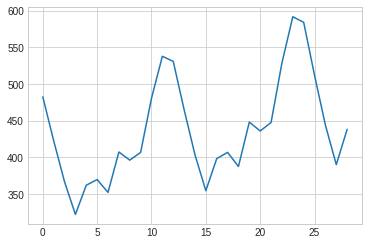

In [ ]:
plt.plot(predicted_values)